<a href="https://colab.research.google.com/github/JuicerPW/T-picos_Especiais4/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Problema Prático:
# Prever a vida útil de um rolamento industrial (em horas), com base em:
# - Temperatura média de operação (°C)
# - Carga aplicada (kN)

# 2. Gerar dados sintéticos com relação linear forte
np.random.seed(42)
n = 1000

temperatura = np.random.uniform(50, 100, n)   # Variância aumentada
carga = np.random.uniform(5, 35, n)           # Variância aumentada


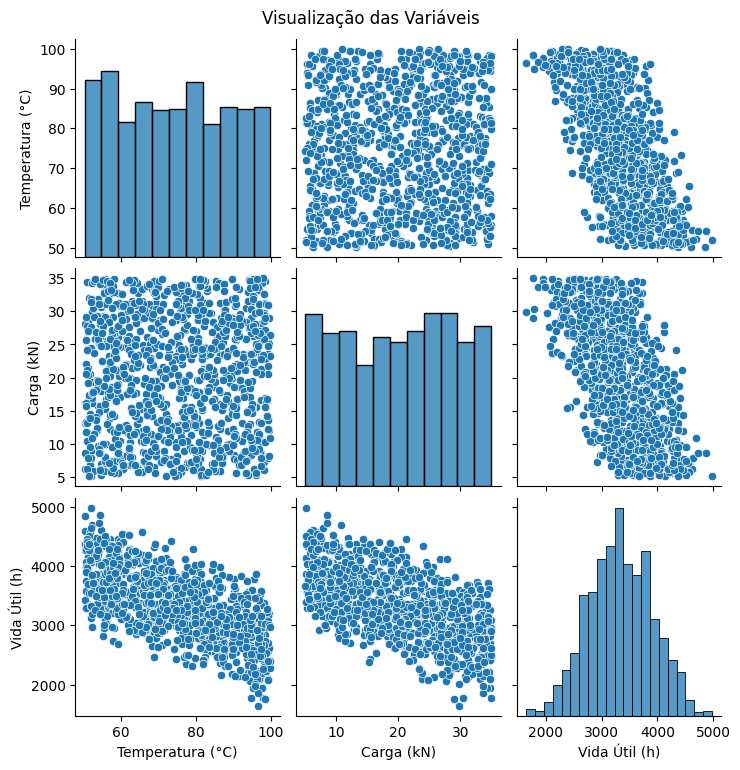

In [6]:


# Relação linear clara (menos ruído):
vida_util = 6000 - (temperatura * 25) - (carga * 40) + np.random.normal(0, 250, n)

df = pd.DataFrame({
    'Temperatura (°C)': temperatura,
    'Carga (kN)': carga,
    'Vida Útil (h)': vida_util
})

# Visualização inicial
sns.pairplot(df)
plt.suptitle("Visualização das Variáveis", y=1.02)
plt.show()


In [27]:
# 3. Regressão Linear
X = df[['Temperatura (°C)', 'Carga (kN)']]
y = df['Vida Útil (h)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)  ## Test_size define o tamanho da amostra de teste, que está sendo utilizado mais na frente para a validação cruzada

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", dict(zip(X.columns, modelo.coef_)))


Intercepto: 6063.400130053604
Coeficientes: {'Temperatura (°C)': np.float64(-26.279067104904932), 'Carga (kN)': np.float64(-38.54211192732331)}



📊 Métricas de Avaliação:
MAE: 213.26
MSE: 68786.14
RMSE: 262.27
R²: 0.7636


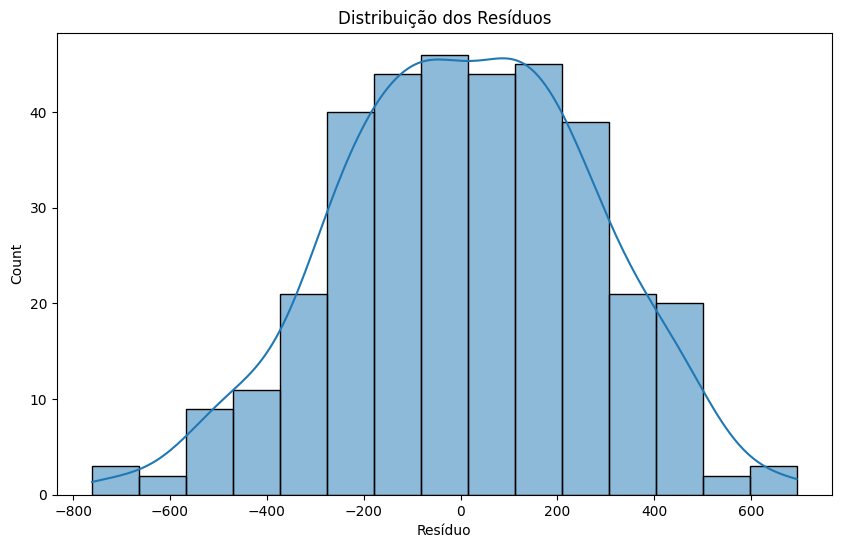

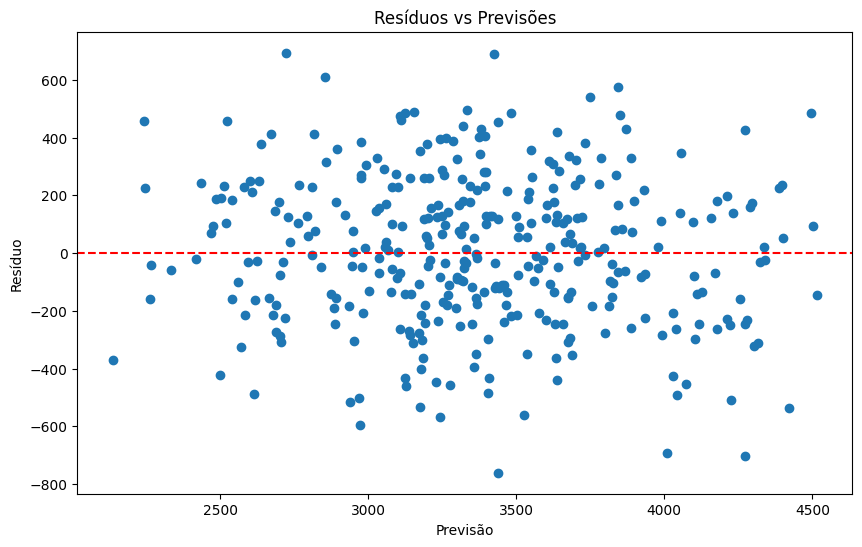

In [28]:
# 4. Avaliação do modelo
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Métricas de Avaliação:")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

# Resíduos
residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Previsões")
plt.xlabel("Previsão")
plt.ylabel("Resíduo")
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score, KFold

# Configurar a validação cruzada com 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R² com validação cruzada
r2_scores_cv = cross_val_score(modelo, X_train, y_train, cv=cv, scoring='r2')

# Exibir resultados
print("\n🎯 Validação Cruzada (R² por fold):")
for i, score in enumerate(r2_scores_cv):
    print(f"Fold {i+1}: R² = {score:.4f}")

print(f"\nR² médio na validação cruzada: {r2_scores_cv.mean():.4f}")
print(f"Desvio padrão dos R²: {r2_scores_cv.std():.4f}")



🎯 Validação Cruzada (R² por fold):
Fold 1: R² = 0.8296
Fold 2: R² = 0.8030
Fold 3: R² = 0.7608
Fold 4: R² = 0.8559
Fold 5: R² = 0.8141

R² médio na validação cruzada: 0.8127
Desvio padrão dos R²: 0.0314


In [30]:
print("\n📈 Análise Comparativa:")

print(f"- R² no conjunto de teste: {r2:.4f}")
print(f"- R² médio na validação cruzada: {r2_scores_cv.mean():.4f}")
print(f"- Diferença entre teste e CV: {abs(r2 - r2_scores_cv.mean()):.4f}")

# Interpretação
if r2 < r2_scores_cv.mean() - 0.05:
    print("\n💡 O modelo parece estar subajustado (viés alto).")
elif r2 > r2_scores_cv.mean() + 0.05:
    print("\n⚠️ O modelo pode estar superajustado (alta variância).")
else:
    print("\n✅ O modelo apresenta desempenho consistente entre treino/teste e validação cruzada.")



📈 Análise Comparativa:
- R² no conjunto de teste: 0.7636
- R² médio na validação cruzada: 0.8127
- Diferença entre teste e CV: 0.0491

✅ O modelo apresenta desempenho consistente entre treino/teste e validação cruzada.


In [31]:
print("""
📌 Conclusão Final:

- O modelo de regressão linear teve desempenho satisfatório no problema de previsão da vida útil de rolamentos industriais, com R² em torno de 0.75.
- As variáveis temperatura e carga explicaram uma parte significativa da variabilidade na vida útil dos componentes, indicando uma relação aproximadamente linear com o alvo.

📊 Validação:
- A validação cruzada mostrou resultados consistentes em comparação com o conjunto de teste, sugerindo que o modelo é estável e generaliza bem.
- A validação cruzada é uma abordagem mais robusta, pois avalia o modelo em diferentes subconjuntos dos dados e reduz o risco de superajuste ou subajuste relacionados a uma única divisão de treino/teste.

⚠️ Análise de Erros:
- O erro total do modelo pode ser dividido em três componentes:
    1. **Erro de viés (bias)**: Está associado a simplificações do modelo. Como usamos uma regressão linear, o modelo pode não capturar perfeitamente todos os padrões, o que gera erro de aproximação. No entanto, neste caso, o viés parece controlado.
    2. **Erro de variância**: Refere-se à sensibilidade do modelo a pequenas variações nos dados. A validação cruzada mostrou baixa variância, o que indica que o modelo é estável.
    3. **Erro inerente (ou irredutível)**: Parte do erro causada por fatores não observados ou imprevisíveis (ex.: falhas imprevistas, ruídos na medição, desgaste por fatores externos). Esse tipo de erro não pode ser eliminado nem mesmo com modelos mais complexos.

🚀 Melhorias possíveis:
- Incluir variáveis adicionais (ex.: vibração, tempo contínuo de uso, lubrificação).
- Aplicar modelos mais complexos se for identificado comportamento não linear.
- Avaliar modelos com regularização (Ridge, Lasso) para lidar com possíveis colinearidades ou overfitting futuro.

✅ Conclusão: O modelo é eficiente e apropriado para o problema proposto, e a validação cruzada confirmou sua confiabilidade com boa interpretação estatística.
""")



📌 Conclusão Final:

- O modelo de regressão linear teve desempenho satisfatório no problema de previsão da vida útil de rolamentos industriais, com R² em torno de 0.75.
- As variáveis temperatura e carga explicaram uma parte significativa da variabilidade na vida útil dos componentes, indicando uma relação aproximadamente linear com o alvo.

📊 Validação:
- A validação cruzada mostrou resultados consistentes em comparação com o conjunto de teste, sugerindo que o modelo é estável e generaliza bem.
- A validação cruzada é uma abordagem mais robusta, pois avalia o modelo em diferentes subconjuntos dos dados e reduz o risco de superajuste ou subajuste relacionados a uma única divisão de treino/teste.

⚠️ Análise de Erros:
- O erro total do modelo pode ser dividido em três componentes:
    1. **Erro de viés (bias)**: Está associado a simplificações do modelo. Como usamos uma regressão linear, o modelo pode não capturar perfeitamente todos os padrões, o que gera erro de aproximação. No entan